In [2]:
import numpy as np # 행렬 연산 패키지
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

font_path ='/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'
font_name = matplotlib.font_manager.FontProperties(fname=font_path).get_name()
matplotlib.rc("font", family = font_name)
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc'

In [ ]:

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
df_raw = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/체질검사.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

In [ ]:
df_raw_y=df_raw["FAT"]
df_raw_x=df_raw.drop("FAT", axis=1, inplace=False)#목표변수, 설명변수 지정

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

In [ ]:
lr_model=smf.ols(formula = "FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST", data = df_raw)
lr_result = lr_model.fit()
print(lr_result.summary())
#의사결정트리 생성
dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 8, min_samples_split = 20, max_depth = 4)
dt_model.fit(df_train_x, df_train_y)
#랜덤포레스트 생성
rf_model = RandomForestRegressor(random_state=1234, n_estimators = 100, min_samples_leaf = 6, min_samples_split = 14, max_depth = 4)
rf_model.fit(df_train_x, df_train_y)
#그래디언트 부스팅 생성
gb_model = GradientBoostingRegressor(random_state=1234, n_estimators = 30, min_samples_leaf = 11, min_samples_split = 22, max_depth = 4, learning_rate = 0.1)
gb_model.fit(df_train_x, df_train_y)

In [ ]:
print(gb_model.score(df_test_x,df_test_y))
print(gb_model.score(df_train_x,df_train_y))

In [ ]:

models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"] #모델 리스트, 그래프를 그리기 생성 목적
mse, rmse, mae, mape = [],[],[],[] #평가 리스트 초기화

In [ ]:

#회귀분석
lr_y_pred = lr_result.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [ ]:
#의사결정나무
dt_y_pred = dt_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [ ]:
#회귀분석
rf_y_pred = rf_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [ ]:
#그래디언트 부스팅
gb_y_pred = gb_model.predict(df_test_x) #예측
#평가
mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

NameError: name 'models' is not defined

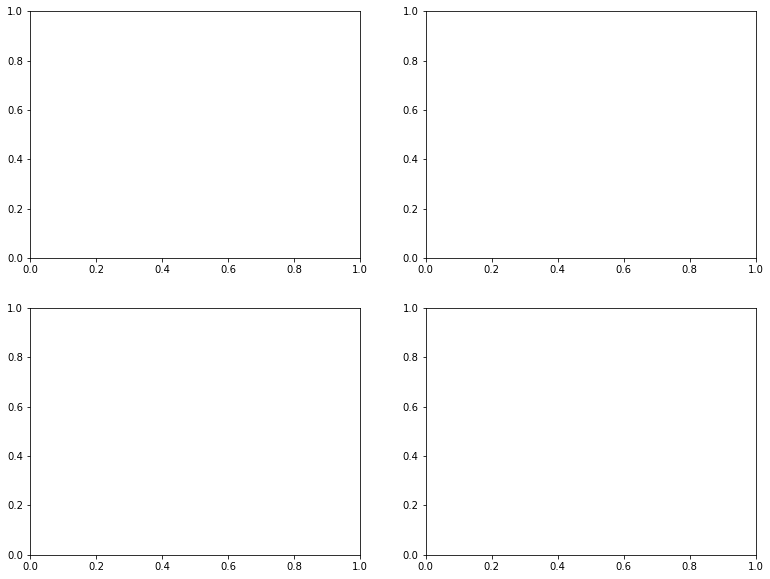

In [3]:
fig, ax = plt.subplots(2,2, figsize = (13, 10))
ax[0,0].bar(models, mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title("rsme").set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title("mape").set_fontsize(15)

# 주성분 분석(PCA) 연습


In [ ]:
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

In [ ]:
df_raw = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/직무능력평가.csv",encoding = 'euc-kr')
df_raw.head()

In [ ]:
df_raw_x = df_raw.drop("EVAL",axis =1)
df_raw_y = df_raw["EVAL"]
df_raw_x.head()

In [ ]:
#변수강 상관관계분석
df_raw_x.corr().round(3)

In [ ]:
#산점도 행렬
sns.pairplot(df_raw_x)

In [ ]:
#데이터 표준화
x_cols =df_raw_x.columns 
scaler = StandardScaler()
#데이터표준화변환
nd_scaled = scaler.fit_transform(df_raw_x)
#표준화된 데이터 확인
print("Scaled Data :\n{}".format(nd_scaled[:5].round(3)))
print("Shape :\n{}".format(nd_scaled.shape))


In [ ]:
df_scaled= pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

In [ ]:
df_scaled.describe().round(3)

In [ ]:

# 주성분 분석모델 생성 Prin1 ~ 6 까지
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(nd_scaled)
#계산된 Prin1~6까지의 Row개수, column개수 화인
print("PCA DATA : \n{}".format(x_pca[:5]))
#shape : Prin 1~6까지 Row개수, column개수 확인
print("Shape: \n{}".format(nd_pca.shape))
#주성분 점수 저장
df_pca = pd.DataFrame(nd_pca,columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])

In [ ]:
df_scaled_pca =df_scaled.join(df_pca)
df_scaled_pca.head()

In [ ]:
# 고유값 확인
#주성분 통계량 입력용 새로운 데이터 프레임 생성
df_pca_stat = pd.DataFrame()
#주성분 분석 모델의 주성분 번호, Elgenvalue, Eigenvalue Ratio 등을 데이터 프레임의 형태로 저장
df_pca_stat["PrinNO"] = [i for i in range(1,7)]
df_pca_stat["EigenValues"] = pca.explained_variance_##Eigen values
df_pca_stat["EigenValueRatio"] = pca.explained_variance_ratio_## Eigenvalue Ratio
df_pca_stat["CumsumEigenValueRatio"] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

In [ ]:
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["EigenValues"],label='고유값')
plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc='best')

In [ ]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["EigenValueRatio"],label ="Ratio")
# 누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat["PrinNO"],df_pca_stat["CumsumEigenValueRatio"],label = "Cumsum Ratio")
# 그래프 label, lengend 설정
plt.ylabel("Eigen Value ratio")
plt.xlabel("Prin")
plt.legend(loc = "best")


In [ ]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

In [ ]:
df_eigenvector= pd.concat([x_cols,pd.DataFrame(pca.components_.T * -1, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)

In [ ]:
#산점도 행렬
sns.pairplot(df_x_pca)

In [ ]:

#상관계수
df_x_pca.corr().round(3)
# 주성분은 서로 독립적, 상관계수 =0

In [ ]:
df_raw_x_const = sm.add_constant(df_raw_x)
reg_model= sm.OLS(df_raw_y,df_raw_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

In [ ]:
df_scaled_const = sm.add_constant(df_scaled)
reg_model = sm.OLS(df_raw_y, df_scaled_const)
reg_model = reg_model.fit()
print(reg_model.summary())

In [ ]:
x_var = ["Prin1","Prin2","Prin3"]
df_pca_const = sm.add_constant(df_pca[x_var])
reg_model = sm.OLS(df_raw_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
df_currency = pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/환율.csv",parse_dates=["APPL_DATE"],encoding = 'euc-kr')
df_currency.head()

In [ ]:
df_currency.isnull().sum()

In [ ]:
#STEP2. 변동추세확인- 시간에 따른 환율 추세 그래프생성
# 중국 위엔화, 엔화, 달러의 크기가 다르기 때문에 각각 그래프를 생성 / 3행1열, 크기:10,8
fig,(ax1,ax2,ax3)= plt.subplots(nrows= 3,ncols= 1, figsize = (10,8))
#zip 함수를 사용하면 zip함수 안의 리스트들을 하나씩 배출
# 1번loop :ax1, 311, "CNY"
# 2번loop :ax2, 312, "JPY"
# 3번loop :ax3, 313, "USD"
for(ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],["CNY","JPY","USD"]):
    #plot 추가, 311 -> 3행 1열의 1번 그래프
    ax.plot("APPL_DATE","STD_RATE",data = df_currency[df_currency["CURRENCY"]==currency])
    ax.set_ylabel(currency,rotation = 0, labelpad = 20)


In [ ]:
#CNY 데이터 추출 후 APPL_DATE를 INDEX로 설정
df_currency_cny= df_currency[df_currency["CURRENCY"]=="CNY"].set_index("APPL_DATE")
#drop method를 이용하여 통화(currency)와 미달러 환산율(USD_CONV_DATE)변수제외
df_currency_cny.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
#JPY데이터 생성
df_currency_jpy = df_currency[df_currency["CURRENCY"] == "JPY"].set_index("APPL_DATE")
df_currency_jpy.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
#USD데이터 생성
df_currency_usd = df_currency[df_currency["CURRENCY"] == "USD"].set_index("APPL_DATE")
df_currency_usd.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace = True)
df_currency_cny.head()
# 중국위엔화환율데이터

In [ ]:
train_size= 0.9
len_idx= len(df_currency_cny.index)
mask=(np.arange(len_idx)/len_idx)<train_size


df_cny_train= df_currency_cny[mask]
df_cny_test= df_currency_cny[~mask]
mask

In [ ]:
#STEP3.시계열 분석: 데이터 분할 - 차분을 통하여 정상성 데이터로 변화
# 1번차분:z(t)- z(t-1)
# shift(n): 앞의 n번 째 행의 데이터를 가져옴
df_cny_diff1 = df_currency_cny["STD_RATE"] - df_currency_cny["STD_RATE"].shift(1)
df_cny_diff1.plot()


In [ ]:
#2번차분 (z(t)-z(t-1))-(z(t-1)-z(t-2)) = z(t)-2*z(t-1) +z(t-2)
df_cny_diff2 = df_currency_cny["STD_RATE"]-2*(df_currency_cny["STD_RATE"].shift(1))+\
    (df_currency_cny["STD_RATE"].shift(2))

df_cny_diff2.plot()


In [ ]:
#STEP 3. 시계열분석 - 자기상관 함수 및 부분 자기상관함수
# LAG를 30까지 하여 ACF,PACF산출
lag_size = 30
fig = plt.figure(figsize = (12,8))
# acf 그래프를 그릴 공간 생성
ax1= fig.add_subplot(211)
# 자기상관 함수 그래프 plot_acf함수 사용 -> 위에 생성한 공간에 그래프 넣기
fig = plot_acf(df_currency_cny["STD_RATE"],lags = lag_size, ax = ax1)
#pacf 그래프를 그릴 공간 생성
ax2 = fig.add_subplot(212)
# 부분 자기상관 함수 그래프 plot_pacf 함수사용 -> 위에 생성한 공간에 그래프넣기
fig = plot_pacf(df_currency_cny["STD_RATE"],lags = lag_size, ax = ax2)



In [ ]:
#AR(1),l(2, 차분),MA(0)인 ARIMA모델
#MA(0)인 이유: 평균을 낼 구간이 현재시점에서 과거 한시점밖에 없으므로 MA가 필요없다
ts_model_cny = ARIMA(df_currency_cny,order = (1,2,0))
#데이터 적합
# trend:상수포함 여부 "nc"이면 상수 미포함, full_output:모든 출력 결과 표시, disp : 수렴정보 출력
ts_result_cny = ts_model_cny.fit(trend= "c",full_output=True,disp = 1)
print(ts_result_cny.summary())
# 절편은 유의하지 않더라도 모델에 포함


In [ ]:
from datetime import datetime
#STEP 4. 예측 및 결과 해석
#예측 시작 날짜 생성: "날짜",format
start_time = df_cny_test.index.min()
end_time = df_cny_test.index.max()
fig,ax = plt.subplots(figsize =(12,8))
# 예측 전까지 데이터
ax = df_cny_train.plot(ax = ax)
# 예측 그래프 생성함수, start:예측시작,end:예측종료, plot_insample:가지고 있는 데이터 중 예측 구간과 겹치는 구간표시
fig = ts_result_cny.plot_predict(start = start_time, end = end_time, ax = ax,plot_insample=False)

